<a href="https://colab.research.google.com/github/haalcala/NYP-SDAI/blob/master/ITI105/project/Fraud_detection_harold_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" align="left"/></a>


# Fraud detection using Logistic Regression

In [1]:
import requests
import io
import os

try:
    os.mkdir("./tmp")
except:
    pass

external_files = [
  {
      "url":"https://raw.githubusercontent.com/haalcala/NYP-SDAI/master/ITI105/project/ds_util.py",
      "local_file":"ds_util.py"
  },
  {
      "url":"https://raw.githubusercontent.com/haalcala/NYP-SDAI/master/ITI105/project/files/bs140513_032310.csv",
      "local_file":"bs140513_032310.csv"
  },
]

for ext_file in external_files:
  req = requests.get(ext_file["url"])

  print(ext_file["local_file"], len(req.content))

  f = open("./tmp/" + ext_file["local_file"],"wb")

  f.write(req.content)

ds_util.py 1917
bs140513_032310.csv 48391391



## load and prepare data


In [2]:
import tmp.ds_util as util

ds_util = util.DSUtil()
ds_util.load_csv("./tmp/bs140513_032310.csv")

# analyse data composition
ds_util.blow_my_mind()

args: {}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
None
unique step    180
dtype: int64
unique customer    4112
dtype: int64
unique age    8
dtype: int64
unique gender    4
dtype: int64
unique zipcodeOri    1
dtype: int64
unique merchant    50
dtype: int64
unique zipMerchant    1
dtype: int64
unique category    15
dtype: int64
unique amount    23767


### drop columns not needed for calculations and get dummy variables

In [3]:
ds_util.drop_columns(["customer", "zipMerchant", "zipcodeOri"])

df = ds_util.get_dummies()

df

,step,amount,fraud,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,4.55,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,39.68,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,26.89,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,17.25,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,35.72,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,20.53,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
594639,179,50.73,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
594640,179,22.44,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594641,179,14.46,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Logistic Regression Stuffs                  

### Environment initialisation

In [4]:
from sklearn.model_selection import train_test_split

#We need to import the k-NN Classifier from skleart.neighbors

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

target_column = "fraud"

y = df[target_column]

X = df.drop(target_column, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)


### Training

In [5]:

lr_clf = LogisticRegression(solver='liblinear', random_state=42)
y_pred = None

def train_fn():
    global lr_clf
    
    lr_clf.fit(X_train, y_train)

ds_util.activity_wrapper("Training", train_fn)

Training ...
Training ... done. 4.326041 seconds


### Testing


Testing ...
0.9958126277022425
[0.99547209 0.99543422 0.99545314]
confusion_matrix [[469383    548]
 [  1615   4168]]
confusion_matrix [[469931      0]
 [     0   5783]]
recall_score: 0.998833871355582
precision_score: 0.9965711107053533
('f1_score:', 0.9977012080613946)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    469931
           1       0.88      0.72      0.79      5783

    accuracy                           1.00    475714
   macro avg       0.94      0.86      0.90    475714
weighted avg       1.00      1.00      1.00    475714

[-11.0901106  -10.69436113 -12.01358125 ... -12.12763913 -11.67927748
 -11.51389657]


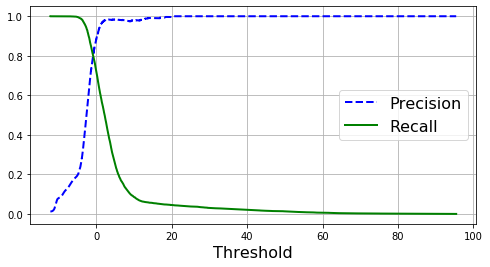

Testing ... done. 31.96749 seconds
All done.


In [6]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                                           

def test_fn():
    global y_pred
    
    y_pred = lr_clf.predict(X_test) 
    
    print(accuracy_score(y_test, y_pred))
    
    print(cross_val_score(lr_clf, X_train, y_train, cv=3, scoring="accuracy"))
    
    y_train_pred = cross_val_predict(lr_clf, X_train, y_train, cv=3)
    
    print("confusion_matrix", confusion_matrix(y_train, y_train_pred))
    
    y_train_perfect_predictions = y_train
    
    print("confusion_matrix", confusion_matrix(y_train, y_train_perfect_predictions))
    
    print("recall_score:", recall_score(y_train, y_train_pred, pos_label=0))
    print("precision_score:", precision_score(y_train, y_train_pred, pos_label=0))
    print(("f1_score:",f1_score(y_train, y_train_pred, pos_label=0)))
    
    print(classification_report(y_train, y_train_pred))
    
    y_scores = cross_val_predict(lr_clf, X_train, y_train, cv=3, method="decision_function")
    
    print(y_scores)
    
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    
    plt.figure(figsize=(8, 4))                      
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    
    plt.show()
        
ds_util.activity_wrapper("Testing", test_fn)

print("All done.")